# Time series forecasting with sktime

#### Student Name: Swarn Singh Warshaneyan.
#### Student Code: IT23139.
#### Course Code: InfT5050.

In [ ]:
! pip install sktime[all_extras]
! pip install pmdarima
import numpy as np
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster
from sktime.split import temporal_train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction

from sktime.performance_metrics.forecasting import  mean_absolute_error, mean_squared_error


# additional models to play with
from sktime.forecasting.arima import ARIMA, AutoARIMA

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

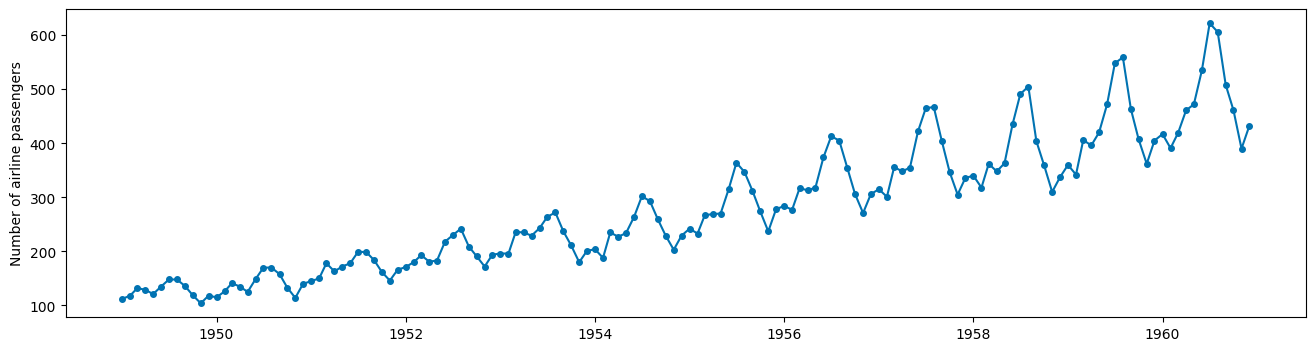

In [ ]:
y = load_airline()

# plotting for visualization
plot_series(y)

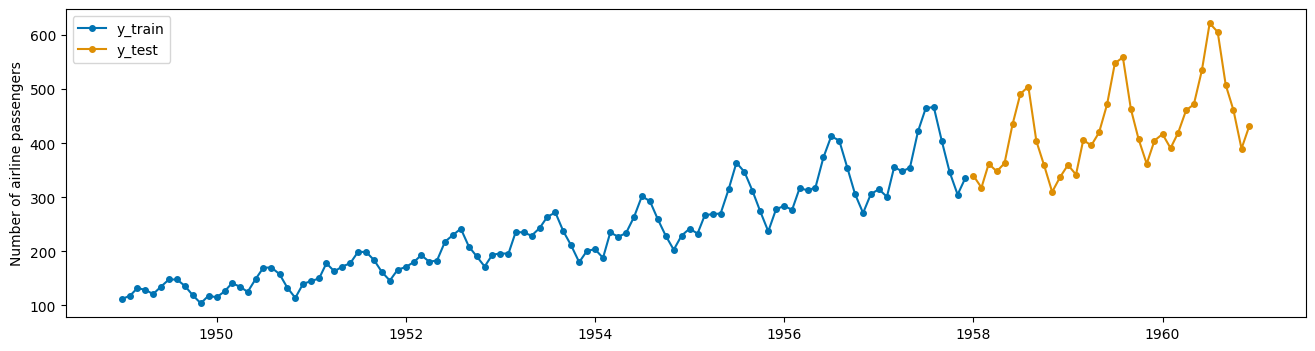

In [ ]:
# separate data into train and test
y_train, y_test = temporal_train_test_split(y)
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

MAE:  18.3874281361726
MSE:  560.6995942871886


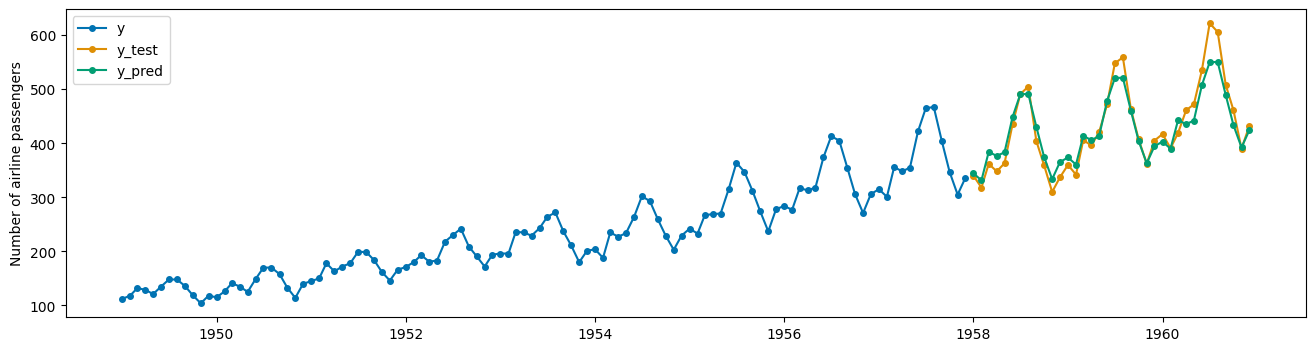

In [ ]:
# Specify forecasting horizon
fh = np.arange(1, y_test.shape[0]+1)

# Specify the forecasting algorithm
#forecaster = NaiveForecaster(strategy="last", sp=12) # this was the original forecaster

# forecaster = ARIMA( # this was the first alternative forecaster
#     order=(1, 1, 0),
#     seasonal_order=(0, 1, 0, 12),
#     suppress_warnings=True)

forecaster = AutoARIMA( # this was the second alternative forecaster
    sp=12, d=0, max_p=2, max_q=2, suppress_warnings=True
)

# Fit the forecaster
forecaster.fit(y_train)

# Predict
y_pred = forecaster.predict(fh)

# Plot predictions and past data
plot_series(y_train, y_test, y_pred, labels=["y", "y_test", "y_pred"])

# Calculate metrics
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

1. Uncomment ARIMA and play with its hyperparameters, try to find the best
2. Uncomment AutoARIMA. Is it better?

MAE:  63.861111111111114
MSE:  5913.666666666667


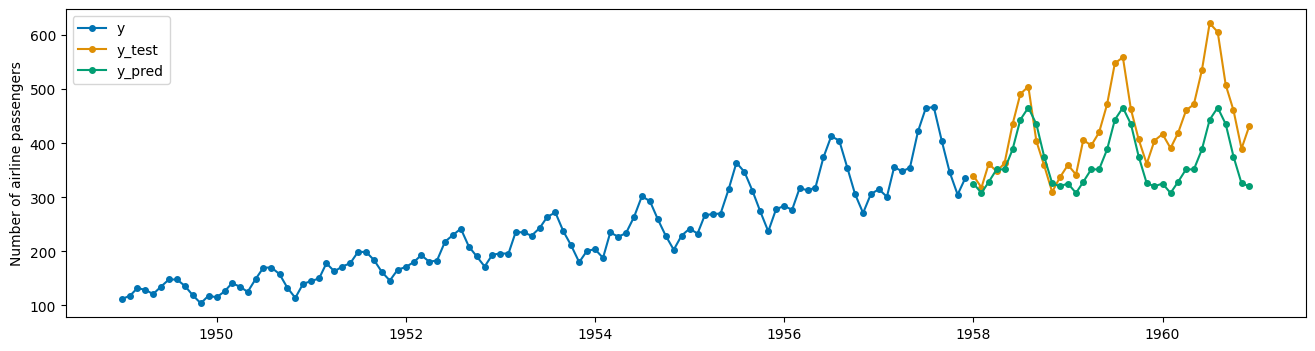

In [ ]:
# Specify our ML model
regressor = KNeighborsRegressor(n_neighbors=2) # original values was 02

# Use it as a core of our forecaster
forecaster = make_reduction(regressor, window_length=12, strategy="recursive") # original value is 12

# Fit the forecaster
forecaster.fit(y_train)

# Make predictions
y_pred = forecaster.predict(fh)

# plotting predictions and past data
plot_series(y_train, y_test, y_pred, labels=["y", "y_test", "y_pred"])

# Calculate metrics
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

1. Play with KNN parameters and a window length
2. Use your favourite sklearn regressors for prediction.

# Student Comments.

My results.

* After step 00 (ran notebook once) -
[pre-regressor]
MAE:  60.083333333333336
MSE:  5418.75
[post-regressor]
MAE:  63.861111111111114
MSE:  5913.666666666667

* After step 01 (increased n_neightbours to 04 from 02) -
[pre-regressor]
MAE:  60.083333333333336
MSE:  5418.75
[post-regressor]
MAE:  63.77777777777778
MSE:  6860.447916666667

* After step 02 (increased window_length to 24 from 12) -
[pre-regressor]
MAE:  60.083333333333336
MSE:  5418.75
[post-regressor]
MAE:  60.791666666666664
MSE:  5666.479166666667

* After step 03 (used arima with default values) -
[pre-regressor]
MAE:  17.81885403192575
MSE:  448.92207902744485
[post-regressor]
MAE:  63.861111111111114
MSE:  5913.666666666667

* After step 04 (used auto arima with default values) -
[pre-regressor]
MAE:  18.3874281361726
MSE:  560.6995942871886
[post-regressor]
MAE:  63.861111111111114
MSE:  5913.666666666667

My conclusions.

* First step improved the post-regressor MAE by a bit but worsened the post-regressor MSE by a bit.

* Second step improved both the post-regressor MAE & MSE by a bit. No change for pre-regressor values.

* Third step improved both the pre-regressor MAE & MSE significantly. No change for post-regressor values.

* Fourth step also improved both the pre-regressor MAE & MSE significantly. No change for post-regressor values.
